<a href="https://colab.research.google.com/github/Triomphi/Hamoye-internship/blob/master/time_series_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/drive/My Drive/DSC AI Stack /household_power_consumption.txt', sep = ';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'],na_values = '?', dtype = float)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
df_copy = df.copy()

In [5]:
df_copy.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [6]:
df_copy.mean()

Global_active_power        1.091615
Global_reactive_power      0.123714
Voltage                  240.839858
Global_intensity           4.627759
Sub_metering_1             1.121923
Sub_metering_2             1.298520
Sub_metering_3             6.458447
dtype: float64

In [7]:
daily = df_copy.resample('D').sum()
daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [8]:
for i in df_copy.columns[df.isnull().any(axis=0)]:
    df_copy[i].fillna(df[i].mean(),inplace=True)

In [9]:
df_copy.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Text(0, 0.5, 'Global_active_power')

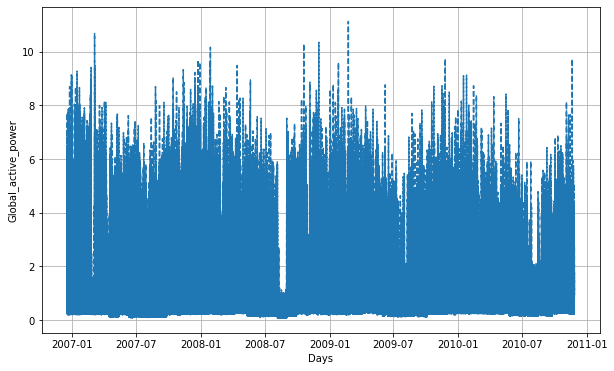

In [10]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df.Global_active_power, '--')
plt.grid()
plt.xlabel('Days')
plt.ylabel('Global_active_power')

In [11]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [12]:
from numpy import cov

In [13]:
covariance = cov(df.Global_active_power, df.Global_reactive_power)

In [14]:
from scipy.stats import pearsonr

In [15]:
corr1, p = pearsonr(daily.dropna()['Global_active_power'], daily.dropna()['Global_reactive_power'])

In [16]:
corr1

0.1285075044962244

In [17]:
corr2, q = np.round(pearsonr(df_copy['Voltage'], df_copy['Global_intensity']), 2)

In [18]:
q

0.0

In [19]:
from fbprophet import Prophet

In [20]:
new_df = daily.reset_index()
new_df = new_df[['datetime', 'Global_active_power']]

new_df = new_df.rename(columns={'datetime': 'ds', 'Global_active_power': 'y'})
new_df.head()

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [23]:
#train = new_df.iloc[:1077, :]
#test = new_df.iloc[1077:,:]
train = new_df[:-365]
test = new_df[-365:]

In [24]:
test.head()

,ds,y
1077,2009-11-27,1380.026
1078,2009-11-28,1858.950
1079,2009-11-29,1650.962
1080,2009-11-30,1745.190
1081,2009-12-01,1756.378


In [25]:
model = Prophet()

In [26]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
testt = model.predict(test)

In [28]:
a = np.array(test.y)

In [29]:
b = np.array(testt.yhat)

In [30]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [31]:
mape = mean_absolute_percentage_error(a, b) 
MAPE = np.mean(np.abs((np.array(test.y) - np.array(testt.yhat)) / np.array(test.y))) * 100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in true_divide



In [32]:
mape

inf

In [33]:
MAPE

inf

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(a, b))

In [35]:
np.round(rms,3)

441.433

In [36]:
new_df.set_index('ds', inplace = True)

In [37]:
new_df1 = new_df.resample('M').sum()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



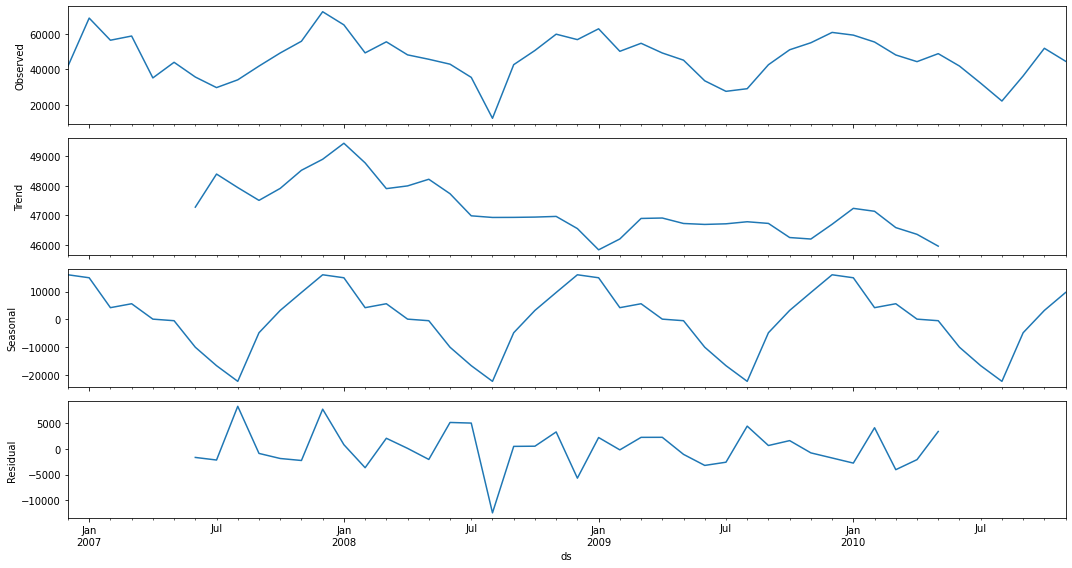

In [38]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(new_df1['y'], model = 'additive')
decompose_series.plot()
plt.show()

In [39]:
n_df = daily.reset_index()
n_df = n_df[['datetime', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

n_df = n_df.rename(columns={'datetime': 'ds', 'Global_active_power': 'y', 'Global_reactive_power': 'add1', 'Voltage': 'add2', 'Global_intensity': 'add3', 'Sub_metering_1': 'add4', 'Sub_metering_2': 'add5', 'Sub_metering_3': 'add6'})
n_df.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [40]:
train2 = n_df.iloc[:1077, :]
test2 = n_df.iloc[1077:,:]

In [41]:
modell = Prophet()
modell.add_regressor('add1')
modell.add_regressor('add2')
modell.add_regressor('add3')
modell.add_regressor('add4')
modell.add_regressor('add5')
modell.add_regressor('add6')

modell.fit(train2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
t = modell.predict(test2)

In [43]:
c = np.array(test2.y)
d = np.array(t.yhat)

In [44]:
mean_absolute_percentage_error(c, d)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in true_divide



inf

In [45]:
rmse = sqrt(mean_squared_error(c, d))
rmse

39.39524688130152

In [46]:
test2.set_index('ds', inplace = True)

In [47]:
n_df1 = test2.resample('D').sum()

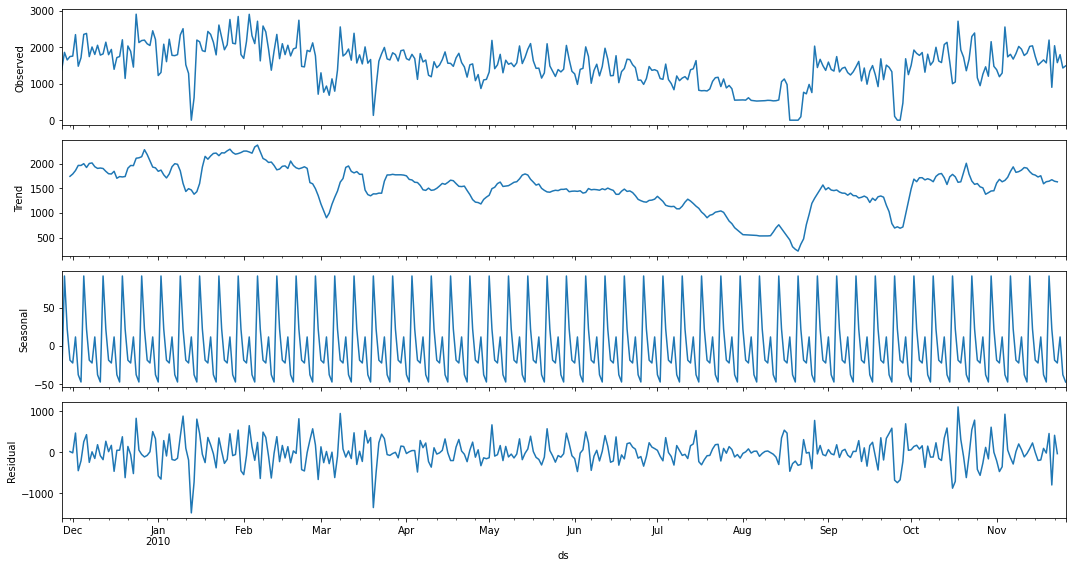

In [48]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(n_df1['y'], model = 'additive')
decompose_series.plot()
plt.show()

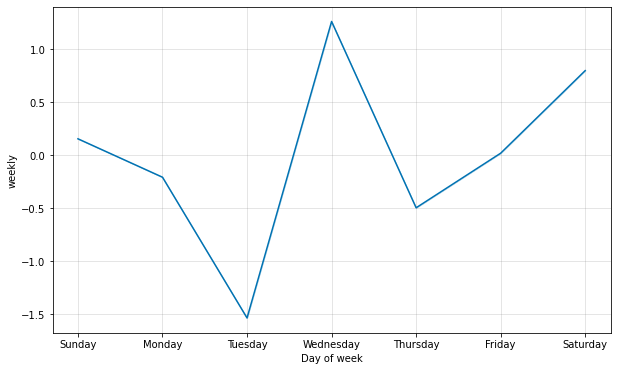

In [49]:
from fbprophet.plot import plot_weekly
plot_weekly(modell)